In [127]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.special as spec
#data array

#burrell data
Experimental = np.array(
                #burrell
                [('burrell', 'C40+ optical', 99.99, 145, 1.168, 1), ('benhelm', 'C40+ optical', 99.925, 3000, 1.168, 1), ('myerson', 'C40+ optical', 99.991, 145, 1.168, 1),],

            #fidelity the average is for the two states (burrell)
            dtype=[('author', np.string_), ('ion', np.string_), ('fidelity', 'float'), ('readout time(us)', 'float'), ('coherence T1(s)', 'U8'), ('coherence T2(ms)','U8')])

print(Experimental)

[(b'', b'', 99.99 ,  145., '1.168', '1')
 (b'', b'', 99.925, 3000., '1.168', '1')
 (b'', b'', 99.991,  145., '1.168', '1')]


In [128]:
#Model(prepared in |B> state)

#functions
def B_Bmean(RB, RD, tb):
    x = (RB+RD)*tb
    return x

def B_Dmean(RD, tb):
    x = RD*tb
    return x

def B_Bo(N, Bmean):
    X = (np.power(Bmean,N)) * (np.exp(Bmean)) / spec.factorial(N)
    return X

def B_Do(N, Dmean):
    X = (np.power(Dmean,N)) * (np.exp(Dmean)) / spec.factorial(N)
    return X


#eB = np.sum(B0) #for n<nc
#eD = np.sum(D0) #for n>nc
#e = (eB+eD)/2

In [129]:
#Model(prepared in |D> state)

#functions
def nc(RB, RD, tb):
    x = RB*tb/(np.log(1+(RB/RD)))
    return x


def D_Bmean(RB, RD, tb):
    x = (RB+RD)*tb
    return x

def D_Dmean(RD, tb):
    x = RD*tb
    return x

def D_Bo(N, Bmean):
    x = (np.power(Bmean,N)) * (np.exp(Bmean)) / np.math.factorial(N)
    return x

#complicated
#def D_Xo(n, Bweight, Dweight):
#    x = D
#    return x

def D_Do(n, Dmean, tb, tau):
    x = (np.e**(-tb/tau) * ((Dmean)**n) * (np.exp(Dmean)) / np.math.factorial(n)) + Xo
    return x


#eB = np.sum(B0) #for n<nc
#eD = np.sum(D0) #for n>nc
#e = (eB+eD)/2

C:\Users\SALAMA~1\AppData\Local\Temp/ipykernel_8048/48227529.py:21: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  DM = np.full(np.int(n/step),Dmean)
No handles with labels found to put in legend.


[23.62164 23.62164 23.62164 23.62164 23.62164 23.62164 23.62164 23.62164
 23.62164 23.62164 23.62164 23.62164 23.62164 23.62164 23.62164 23.62164
 23.62164 23.62164 23.62164 23.62164 23.62164 23.62164 23.62164 23.62164
 23.62164 23.62164 23.62164 23.62164 23.62164 23.62164 23.62164 23.62164
 23.62164 23.62164 23.62164 23.62164 23.62164 23.62164 23.62164 23.62164
 23.62164 23.62164 23.62164 23.62164 23.62164 23.62164 23.62164 23.62164
 23.62164 23.62164 23.62164 23.62164 23.62164 23.62164 23.62164 23.62164
 23.62164 23.62164 23.62164 23.62164]
[1.81446212e+10 2.61660542e+10 3.71952439e+10 5.22060268e+10
 7.24467909e+10 9.95079978e+10 1.35404132e+11 1.82672719e+11
 2.44493477e+11 3.24831100e+11 4.28605709e+11 5.61895556e+11
 7.32177218e+11 9.48609209e+11 1.22236572e+12 1.56702807e+12
 1.99904228e+12 2.53825247e+12 3.20852050e+12 4.03844385e+12
 5.06218489e+12 6.32042597e+12 7.86146666e+12 9.74248054e+12
 1.20309513e+13 1.48063092e+13 1.81617912e+13 2.22065504e+13
 2.70680415e+13 3.289471

Text(0.5, 1.0, 'P(n) vs n')

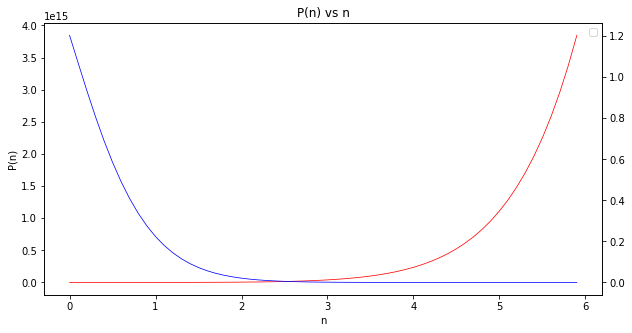

In [130]:
#Variables

#Burrell quoted
#RB = 55800 s−1
#RD = 442 s−1
#tb = 420 us = .00042
#n = counts
#nc = diferentiation counts

n = 6

Rb = 55800 
Rd = 442
tb = .00042
step = .1
N = np.arange(start=0,stop=n,step = step)

Bmean = B_Bmean(Rb,Rd,tb)
BM = np.full(np.int_(n/step),Bmean)
Dmean = B_Dmean(Rd,tb)
DM = np.full(np.int(n/step),Dmean)
print(BM)
#print(DM)
B0 = B_Bo(N,BM)
D0 = B_Do(N,DM)
print(B0)
#print(D0)

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(N, B0, lw=0.75, c="r")
ax1.set_ylabel("P(n)")
ax1.set_xlabel("n")
ax2 = ax1.twinx()
ax2.plot(N, D0, lw=0.75, c="b")
ax1.legend()
plt.title("P(n) vs n")

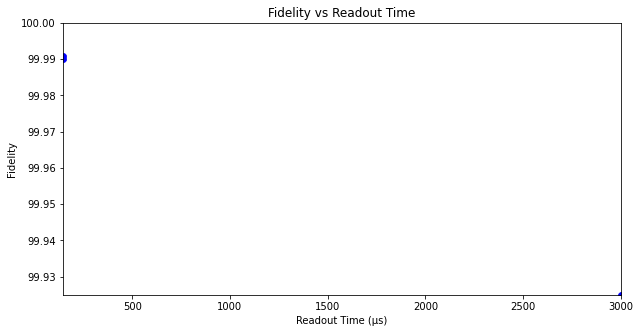

In [131]:
#graphing
fidelity = (Experimental['fidelity'])
readTime = (Experimental['readout time(us)'])

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)
plt.scatter(readTime, fidelity, lw=0.75, c="b")
ax1.set(xlim=(np.min(readTime), np.max(readTime)), ylim=(np.min(fidelity), 100))
ax1.set_ylabel("Fidelity")
ax1.set_xlabel(u"Readout Time (\u03bcs)")
#ax1.legend()
plt.title("Fidelity vs Readout Time")

plt.show()